## Convolutional Neural Network for CIFAR-10 Dataset

## Installing required libraries
!pip install tensorflow
!pip install keras
!pip install matplotlib
!pip install numpy

## installig required libaries

In [18]:
!pip install tensorflow 
!pip install keras 
!pip install matplotlib 
!pip install numpy
!pip install scikit-learn

## importing required modules

In [23]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import sklearn

## loading dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

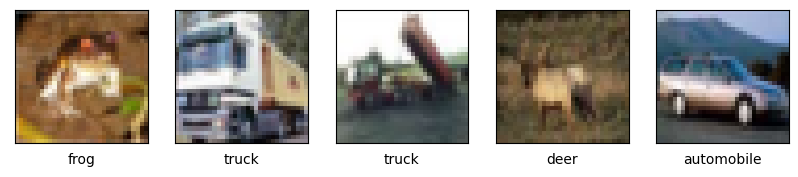

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=7, 
                    validation_data=(test_images, test_labels))

Epoch 1/7
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4887 - accuracy: 0.4559 - val_loss: 1.1917 - val_accuracy: 0.5760
Epoch 2/7
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1100 - accuracy: 0.6064 - val_loss: 1.0448 - val_accuracy: 0.6313
Epoch 3/7
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9558 - accuracy: 0.6628 - val_loss: 0.9521 - val_accuracy: 0.6734
Epoch 4/7
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8539 - accuracy: 0.7003 - val_loss: 0.9558 - val_accuracy: 0.6684
Epoch 5/7
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7767 - accuracy: 0.7282 - val_loss: 0.8798 - val_accuracy: 0.6947
Epoch 6/7
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7152 - accuracy: 0.7516 - val_loss: 0.8404 - val_accuracy: 0.7164
Epoch 7/7
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6639 - accuracy: 0.7677 - val_loss: 0.8389 - val_ac

313/313 - 4s - loss: 0.8389 - accuracy: 0.7196 - 4s/epoch - 14ms/step


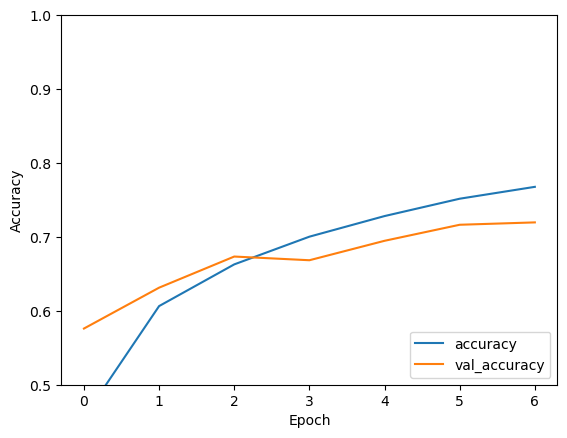

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [27]:
!pip install scikit-learn

from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classificaion report: \n", classification_report(test_labels, y_pred_classes))

313/313 [==============================] - 4s 13ms/step
classificaion report: 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1000
           1       0.80      0.86      0.83      1000
           2       0.73      0.52      0.61      1000
           3       0.53      0.57      0.55      1000
           4       0.70      0.65      0.67      1000
           5       0.65      0.58      0.61      1000
           6       0.73      0.82      0.77      1000
           7       0.74      0.79      0.76      1000
           8       0.76      0.89      0.82      1000
           9       0.81      0.77      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [28]:
print(test_acc)

0.7196000218391418
